In [ ]:
# before you check this i have not figure out how to make my diffusion operator work. Other than that I am almost done. 
# Sorry for letting down but I just want to put it here.

In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
import numpy as np



# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
service = QiskitRuntimeService(channel="ibm_quantum")



In [3]:

user_prime_list = [2,3,5, 7, 11, 13] 
user_sum = 18

In [4]:
max_prime_number = max(user_prime_list)
num_qubits_for_1_number = len(bin(max_prime_number)[2:])
number_1_qubits = [i for i in range(num_qubits_for_1_number)]
number_2_qubits = [num_qubits_for_1_number + i for i in range(num_qubits_for_1_number)]
sum_number_qubits = [num_qubits_for_1_number* 2 + i for i in range(num_qubits_for_1_number + 1)]
ancilla = [len(number_1_qubits) + len(number_2_qubits) + len(sum_number_qubits)]
all_qubits = number_1_qubits +number_2_qubits + sum_number_qubits + ancilla

print('number_1_qubits = ',number_1_qubits )
print('number_2_qubits = ' , number_2_qubits)
print('sum_number_qubits = ' ,sum_number_qubits)
print('ancilla = ' , ancilla)
print('all_qubits = ' , all_qubits)


sum_binary = num_qubits_for_1_number + 1
qubits_number = num_qubits_for_1_number * 2 + sum_binary + 1 # (num_qubits_for_1_number + 1 for sum and another 1 for ancilla)

print()
print("sum_binary = " , sum_binary)
print("qubits_number = ", qubits_number)


number_1_qubits =  [0, 1, 2, 3]
number_2_qubits =  [4, 5, 6, 7]
sum_number_qubits =  [8, 9, 10, 11, 12]
ancilla =  [13]
all_qubits =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

sum_binary =  5
qubits_number =  14


In [5]:
def initilization(prime_numbers_list , qubits ): 
    
    '''
    prime_numbers_list = [2,3,5, 7, 11, 13] 
    qubits_list = [0,1,2,3]
    '''
    #int list to strings 
    max_prime_number = max(prime_numbers_list)
    num_qubits = len(bin(max_prime_number)[2:])
    prime_numbers_binary = [format(prime, f'0{num_qubits}b') for prime in prime_numbers_list]
    
    prime_state_vector = np.zeros(2 ** num_qubits, dtype=complex)
    
    for binary_repr in prime_numbers_binary:
        index = int(binary_repr, 2)
        prime_state_vector[index] = 1.0 / np.sqrt(len(prime_numbers_binary))

    qc.initialize(prime_state_vector, qubits)

    
    
def adder(index):
    # index is the qubit list eq index = [ 0,1,2,3 ] 
    qc.ccx(index[0], index[1], index[3])
    qc.cx(index[0], index[1] )
    qc.ccx(index[1], index[2], index[3])
    qc.cx(index[1], index[2])
    qc.cx(index[0], index[1] )
    qc.barrier()
    
def adder_inverse(index):
    # index is the qubit list eq index = [ 0,1,2,3 ] 
    
    qc.cx(index[0], index[1])
    qc.cx(index[1], index[2])
    qc.ccx(index[1], index[2], index[3])
    qc.cx(index[0], index[1] )
    qc.ccx(index[0], index[1], index[3])
    qc.barrier()
    
def bit_checker(bit, qubit, anc):
    ''' 4 meanas 100 , s1 and s2 shold have x gate
    bit is a int
    qubit is list [8, 9 ,10,11]
    '''
    bit = bin(bit)[2:]
    size = len(bit) # size of bit
    
    for i in range(size):
        if bit[i] =='0':
            qc.x(qubit[size - i - 1])
    qc.mct(qubit, anc)
    for i in range(size):
            if bit[i] =='0':
                qc.x(qubit[size - i - 1])  
                
    qc.barrier()
    
def diffusion_operator(user_prime_list, qubits , anc):
    initilization( user_prime_list , num[0:num_qubits_for_1_number])
    initilization( user_prime_list , num[num_qubits_for_1_number:num_qubits_for_1_number*2])
    
    qc.x(qubits )
    qc.mct(qubits, anc)
    qc.x(qubits)
    qc.x(anc)
    
    initilization( user_prime_list , num[num_qubits_for_1_number:num_qubits_for_1_number*2])
    initilization( user_prime_list , num[0:num_qubits_for_1_number])
    
    qc.barrier()


 

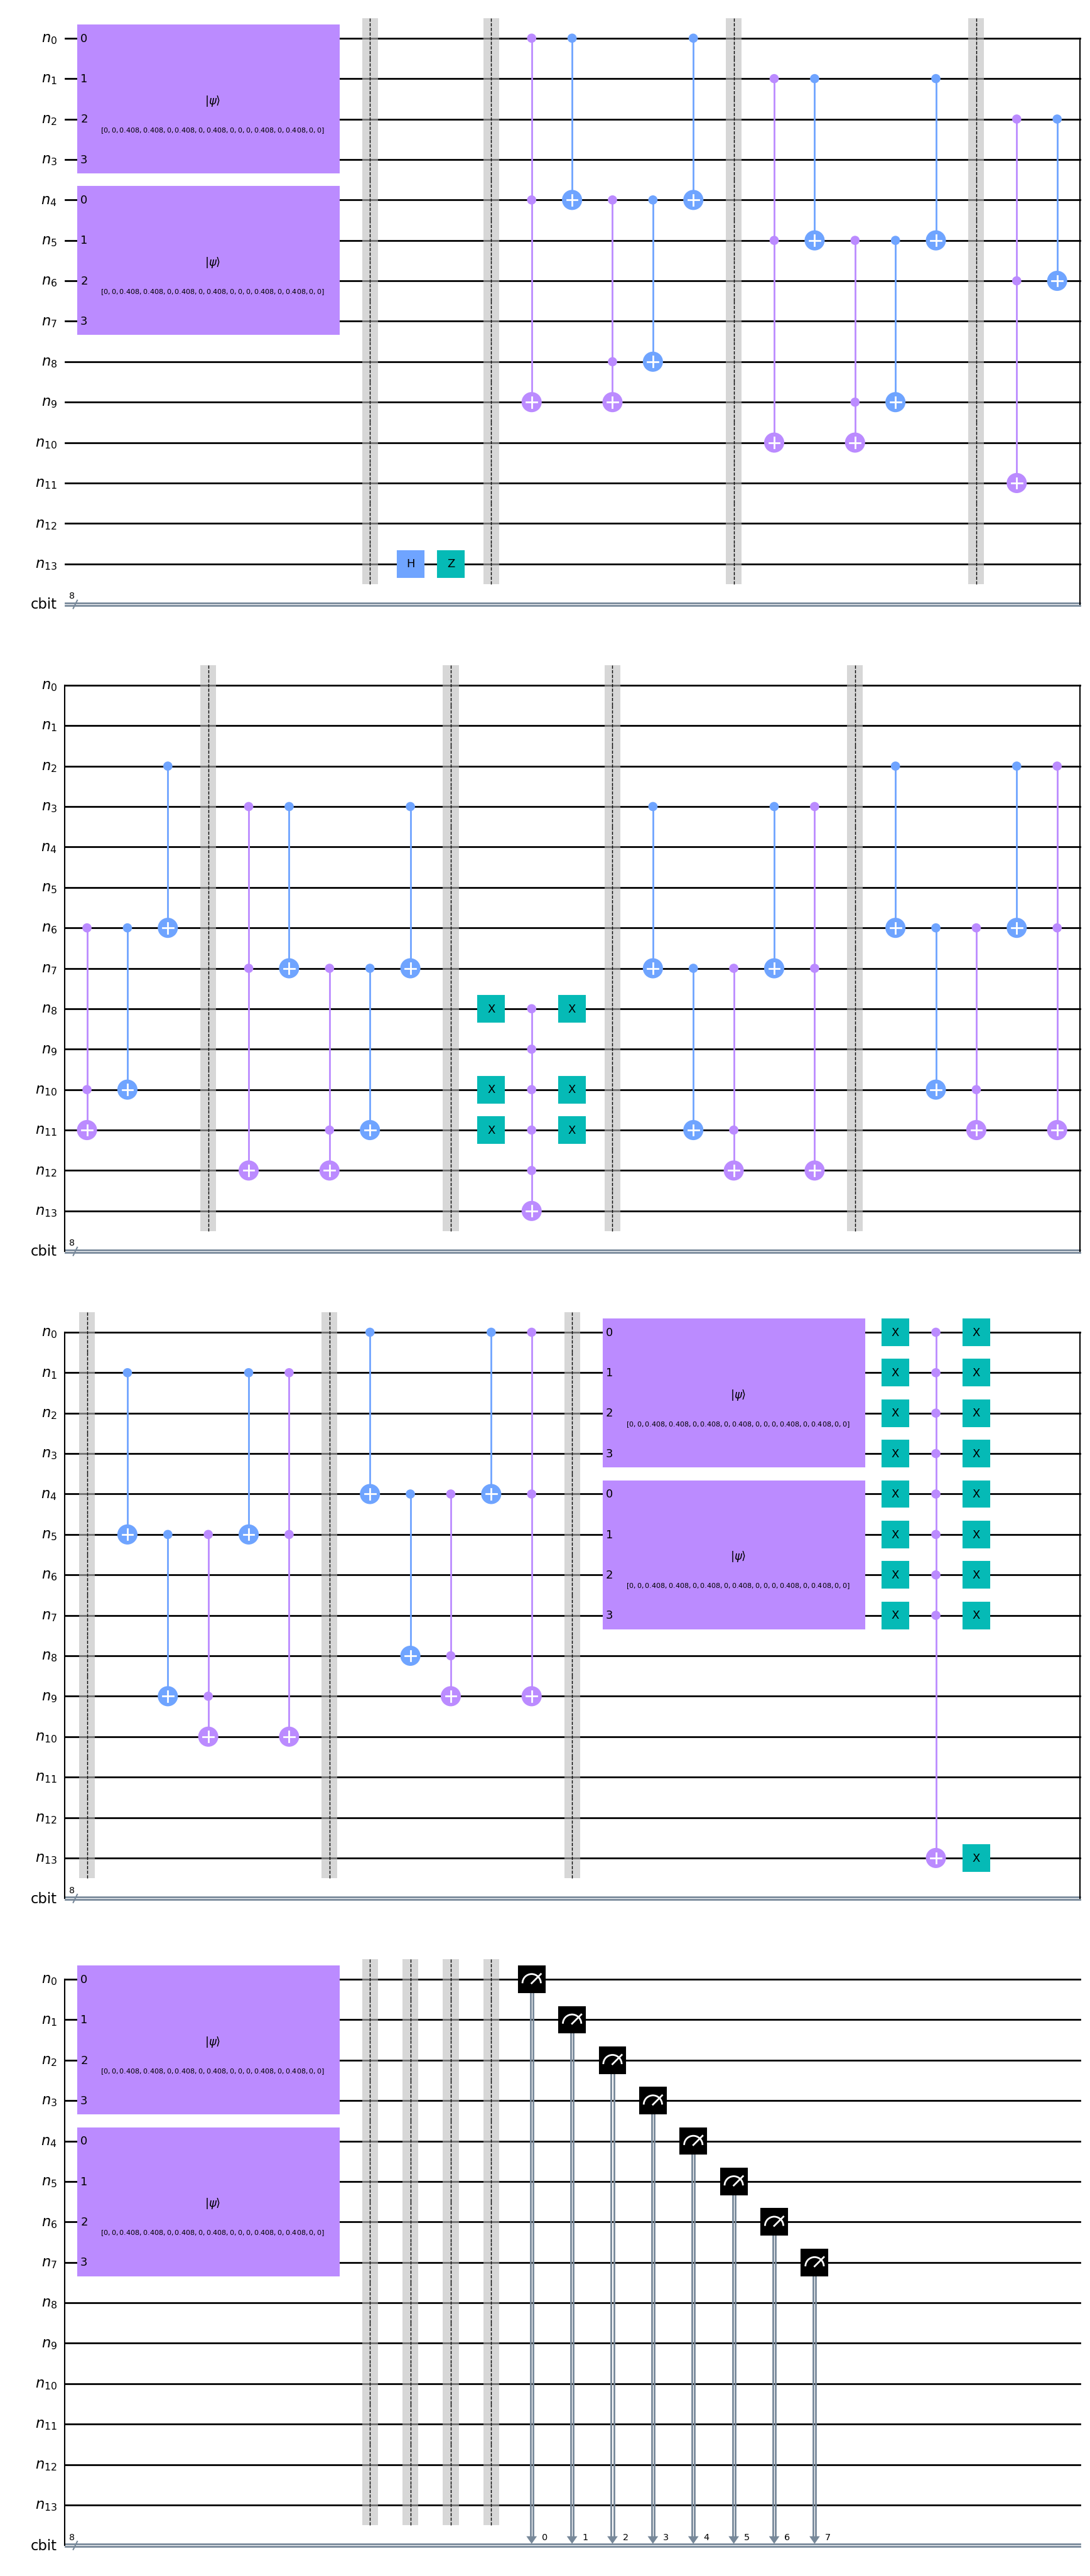

In [6]:
   
cbit = ClassicalRegister(8, 'cbit')
num = QuantumRegister(qubits_number, 'n')
qc = QuantumCircuit(num, cbit)



initilization( user_prime_list , num[0:num_qubits_for_1_number])
initilization( user_prime_list , num[num_qubits_for_1_number:num_qubits_for_1_number*2])
qc.barrier()



qc.h(qubits_number-1)
qc.z(qubits_number-1)
qc.barrier()    

for i in range(num_qubits_for_1_number):
    adder([i, i+num_qubits_for_1_number, i+num_qubits_for_1_number*2, i + num_qubits_for_1_number*2 + 1])

bit_checker(user_sum, sum_number_qubits , qubits_number-1) #need to generalise it 

##mirror  version
for i in range(num_qubits_for_1_number):
    a = num_qubits_for_1_number - i -1 # idk why -1 should we introduce
    adder_inverse([a, a+num_qubits_for_1_number, a+num_qubits_for_1_number*2, a+ num_qubits_for_1_number*2 + 1])

## only inverse version
# for i in range(num_qubits_for_1_number):
#     adder_inverse([i, i+num_qubits_for_1_number, i+num_qubits_for_1_number*2, i + num_qubits_for_1_number*2 + 1])
    

diffusion_operator(user_prime_list,number_1_qubits + number_2_qubits, ancilla)

qc.barrier()
qc.barrier()
qc.barrier()



qc.measure(number_1_qubits + number_2_qubits, number_1_qubits + number_2_qubits)



qc.draw()

In [ ]:
#vnot able to work on the diffusion operator ( initialization circuit - I know how it should work, but could not write it in code.
# will look at it later

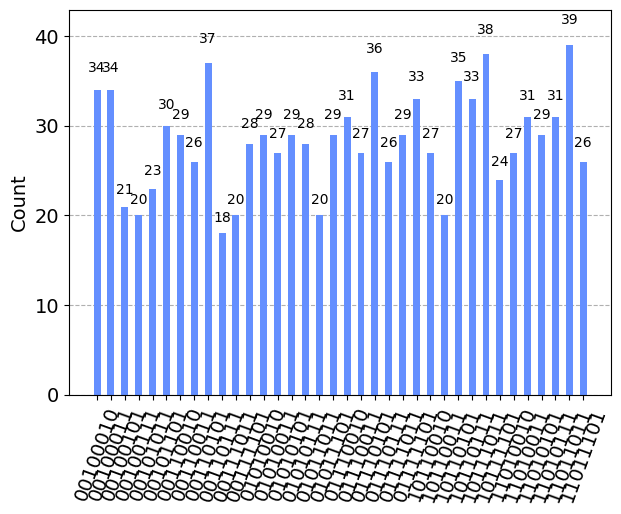

In [7]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=1024)
result = job.result()
count = result.get_counts()
plot_histogram(count)


In [ ]:
# next possible way is to simply serach for all space and take out the result but, that will make the use of Grovers for now purpose.

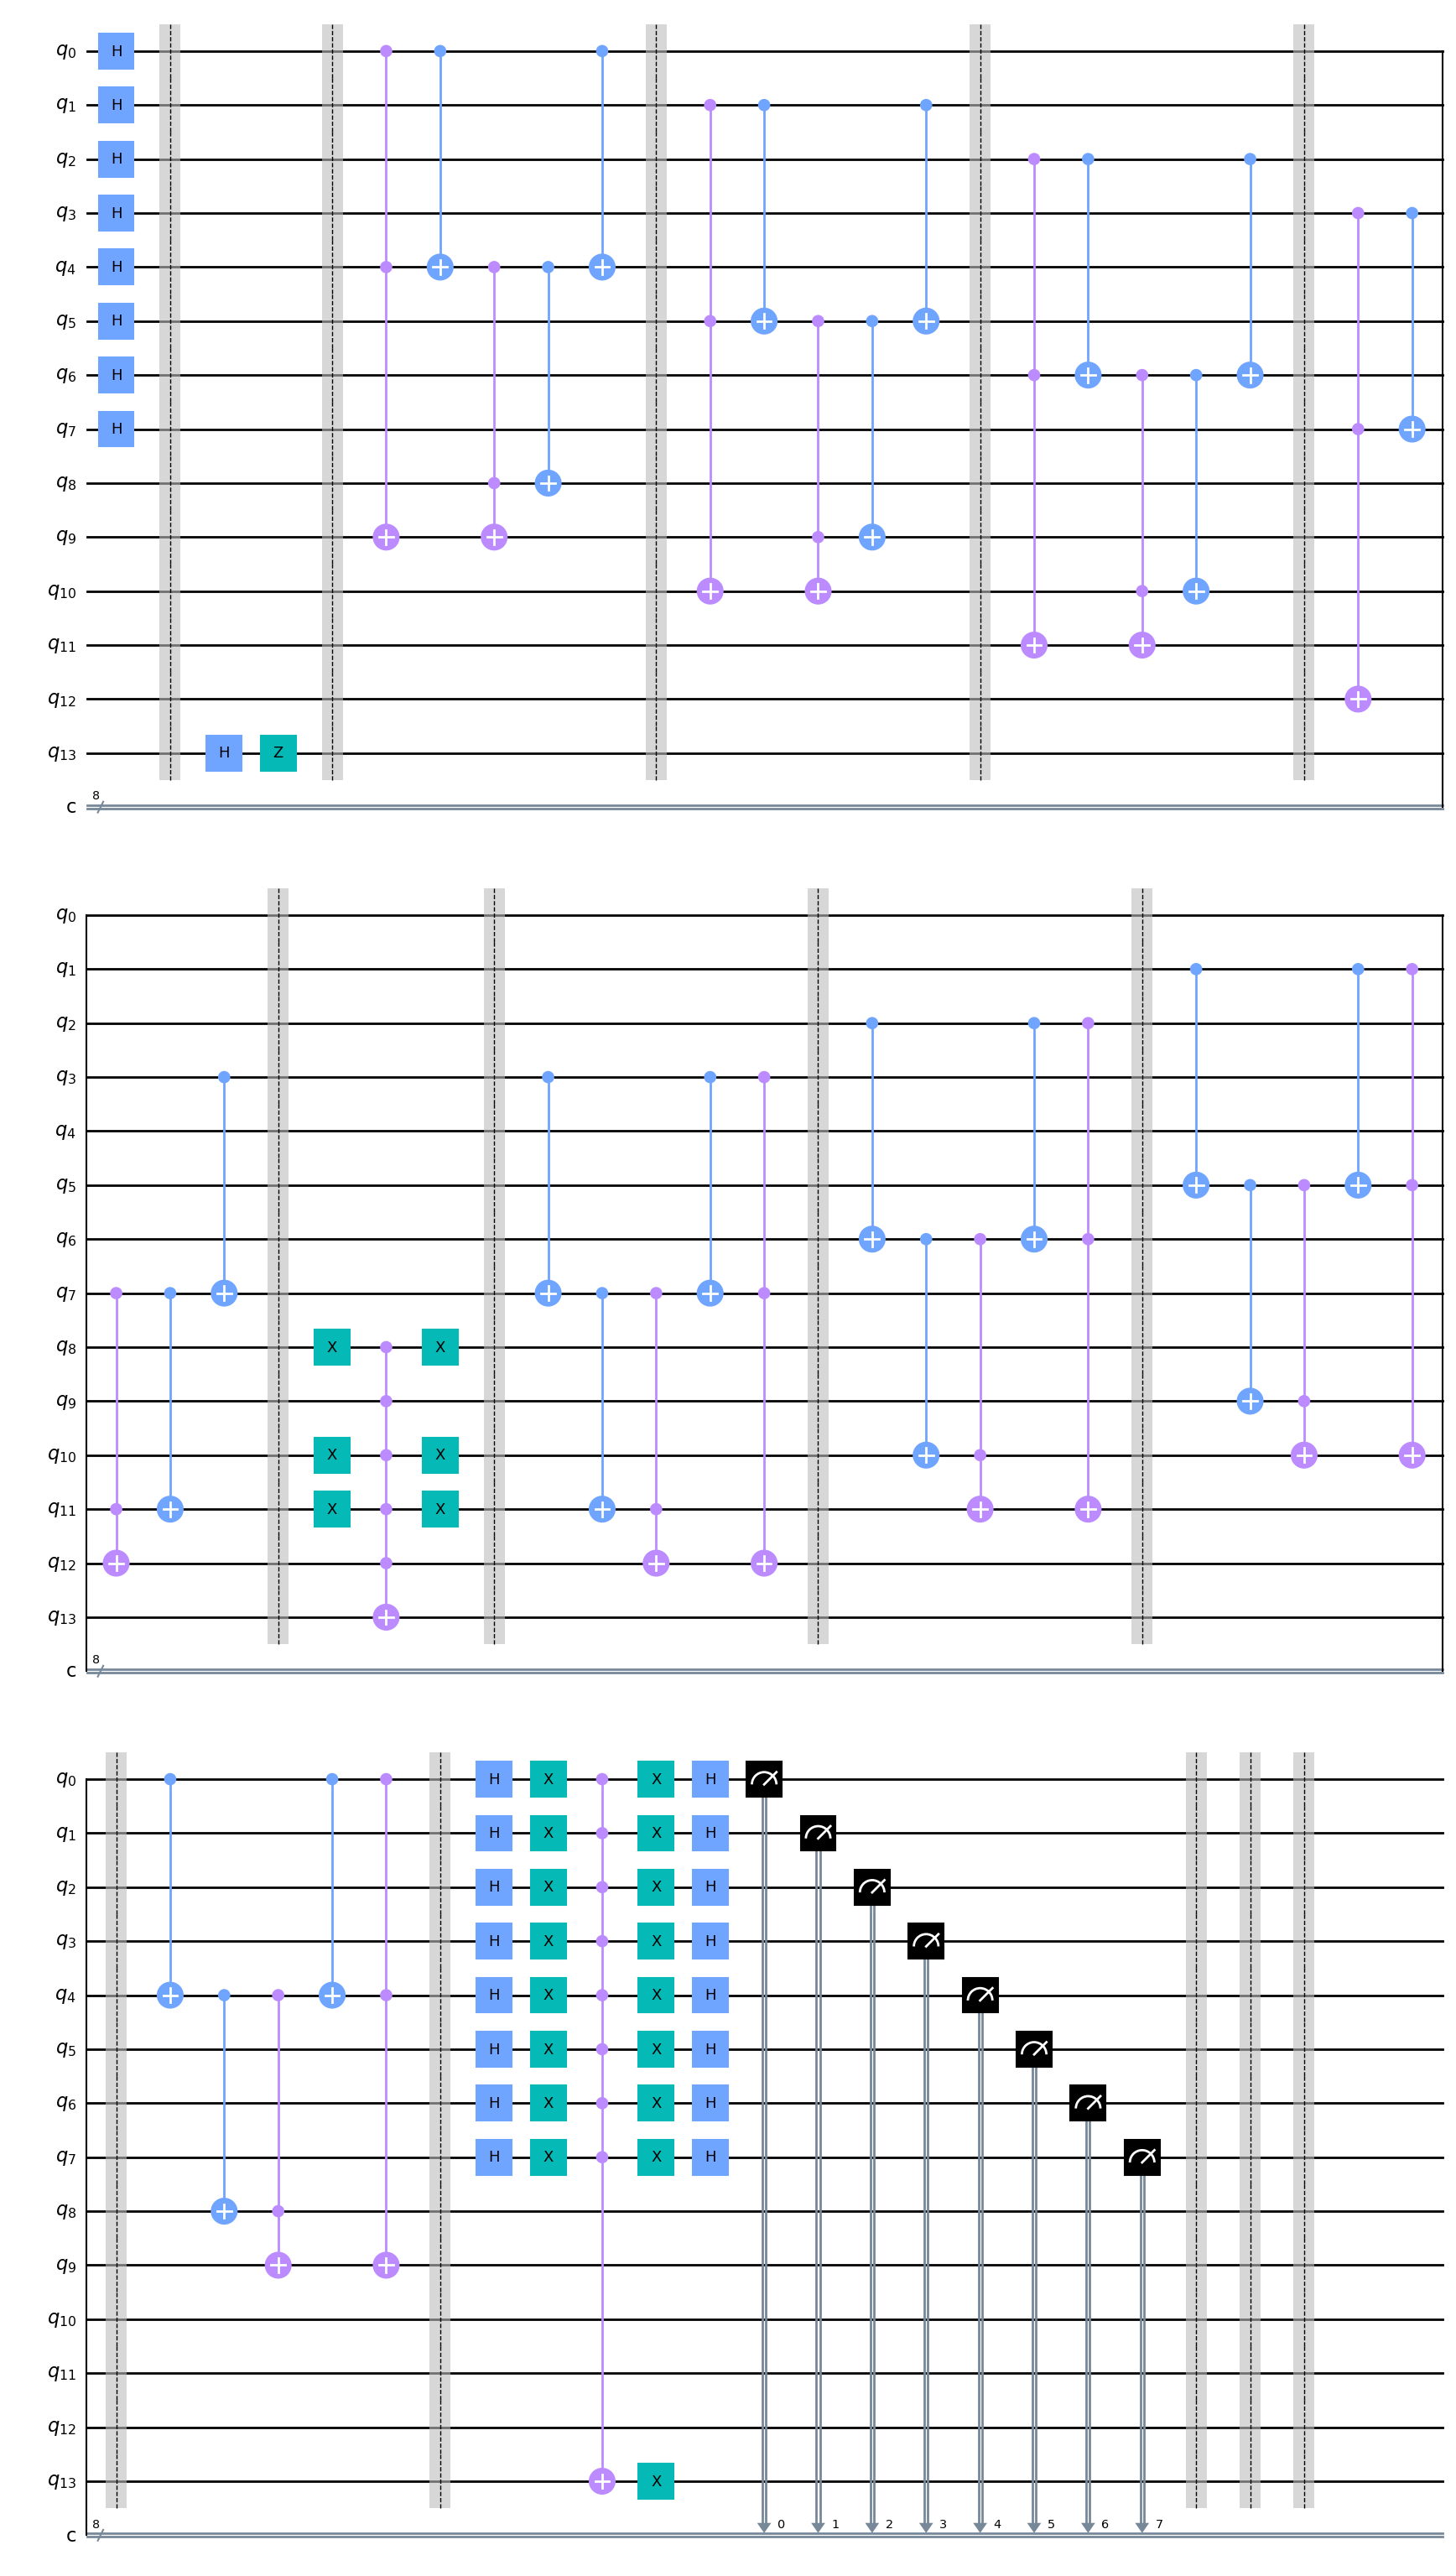

In [8]:
qc = QuantumCircuit(14,8)
#bit 1 prep

# qc.x(0)
# qc.x(1)
# qc.x(2)
# qc.x(3)

# 1111

#bit 2 prep
# qc.x(4)
# qc.x(5)
# qc.x(6)
# qc.x(7)

# 1111

# initilization( user_prime_list , num[0:num_qubits_for_1_number])
# initilization( user_prime_list , num[num_qubits_for_1_number:num_qubits_for_1_number*2])
qc.h(number_1_qubits+ number_2_qubits)
qc.barrier()



qc.h(qubits_number-1)
qc.z(qubits_number-1)
qc.barrier()    

for i in range(num_qubits_for_1_number):
    adder([i, i+num_qubits_for_1_number, i+num_qubits_for_1_number*2, i + num_qubits_for_1_number*2 + 1])

bit_checker(user_sum, sum_number_qubits , qubits_number-1) #need to generalise it 

##mirror  version
for i in range(num_qubits_for_1_number):
    a = num_qubits_for_1_number - i -1 # idk why -1 should we introduce
    adder_inverse([a, a+num_qubits_for_1_number, a+num_qubits_for_1_number*2, a+ num_qubits_for_1_number*2 + 1])

## only inverse version
# for i in range(num_qubits_for_1_number):
#     adder_inverse([i, i+num_qubits_for_1_number, i+num_qubits_for_1_number*2, i + num_qubits_for_1_number*2 + 1])
    

#diffusion operator 
qc.h(number_1_qubits+ number_2_qubits)
qc.x(number_1_qubits+ number_2_qubits)

qc.mct(number_1_qubits+ number_2_qubits, ancilla)

qc.x(ancilla)

qc.x(number_1_qubits+ number_2_qubits)
qc.h(number_1_qubits+ number_2_qubits)


qc.measure(number_1_qubits + number_2_qubits, number_1_qubits + number_2_qubits)



qc.barrier()
qc.barrier()
qc.barrier()


qc.draw()


In [75]:

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=1024)
result = job.result()
count = result.get_counts()
count

{'00011100': 1,
 '00101011': 1,
 '01011110': 1,
 '01010101': 1,
 '11001010': 1,
 '11011100': 1,
 '00111000': 2,
 '11000100': 1,
 '01111000': 1,
 '11011010': 1,
 '01000010': 1,
 '00010010': 3,
 '01001011': 1,
 '01111110': 4,
 '00010001': 2,
 '01001111': 1,
 '11000001': 2,
 '01000101': 2,
 '10101100': 3,
 '10000100': 1,
 '11101001': 2,
 '01100001': 3,
 '01000111': 3,
 '01000100': 2,
 '11001100': 1,
 '10010011': 1,
 '11100011': 1,
 '10100100': 2,
 '10110101': 2,
 '00101110': 2,
 '00110111': 5,
 '11111010': 1,
 '01111010': 3,
 '11110000': 4,
 '10101001': 2,
 '00100001': 2,
 '01111001': 6,
 '00011001': 1,
 '10010001': 4,
 '11110001': 1,
 '10110011': 1,
 '00101000': 2,
 '01011010': 1,
 '01000110': 1,
 '00110110': 3,
 '01100010': 2,
 '00100010': 2,
 '01101111': 2,
 '11010001': 3,
 '00000111': 3,
 '11001110': 2,
 '11011001': 4,
 '00001111': 3,
 '10100000': 2,
 '01110101': 3,
 '10101111': 1,
 '11101101': 3,
 '11111111': 2,
 '01001010': 2,
 '10110110': 2,
 '11010000': 3,
 '00101001': 2,
 '111010

In [9]:
string_count = str(count)
string_count

#sort count
count_sorted = sorted(count.items(), key=lambda x:x[1], reverse=True)

# collect answers with Top 9 probabilities
ans_list = count_sorted[0:9]
low_list = count_sorted[:-1]

low_list

[('11011011', 39),
 ('10111011', 38),
 ('00110101', 37),
 ('01110101', 36),
 ('10110101', 35),
 ('00100010', 34),
 ('00100011', 34),
 ('01111101', 33),
 ('10110111', 33),
 ('11010111', 31),
 ('01110010', 31),
 ('11010011', 31),
 ('00101101', 30),
 ('00110010', 29),
 ('11010101', 29),
 ('01111011', 29),
 ('01010010', 29),
 ('01010101', 29),
 ('01011101', 29),
 ('01010111', 28),
 ('00111101', 28),
 ('01110011', 27),
 ('01010011', 27),
 ('11010010', 27),
 ('10110010', 27),
 ('00110011', 26),
 ('11011101', 26),
 ('01110111', 26),
 ('10111101', 24),
 ('00101011', 23),
 ('00100101', 21),
 ('10110011', 20),
 ('01011011', 20),
 ('00100111', 20),
 ('00111011', 20)]